In [1]:
%%capture
import sys


In [2]:
import pandas as pd

In [3]:
train=pd.read_csv("/Users/huanqingxu/Desktop/apple-app/app_train.csv" )

In [4]:
test=pd.read_csv("/Users/huanqingxu/Desktop/apple-app/app_test.csv")

In [5]:
train.head()

id                                      track_name  size_bytes  \
0  1169417102                                         ミリオン行進曲   196380672   
1   965748314                                 Pinata Hunter 3    38805504   
2   307764057                                        niconico    25808896   
3  1005783927  Frozen Frenzy Mania: Challenging Match 3 Games   296790016   
4   350642635                              Plants vs. Zombies   105379840   

  currency  price  rating_count_tot  rating_count_ver     ver cont_rating  \
0      USD   4.99                 1                 1    1.02          4+   
1      USD   0.00               199               199   1.0.0          9+   
2      USD   0.00               182                 0    6.52         17+   
3      USD   0.00              4104               143   2.1.1          4+   
4      USD   0.99            426463               680  1.9.13          9+   

     prime_genre  sup_devices.num  ipadSc_urls.num  lang.num  vpp_lic  \
0          Games               38                5         1        1   
1          Games               43                3        16        0   
2  Entertainment               37                5         3        1   
3          Games               37                5         1        1   
4          Games               38                0         5        1   

                                                desc  rating  
0  音楽事務所の社長に就任して歌手の卵を育てる、アイドル歌手育成シミュレーションゲーム ！\r\...       0  
1  Finally, it is back! The Pinata is here with t...       0  
2  The Niconico app allows you to watch Niconico ...       0  
3  Match ice cream treats to break through cookie...       1  
4  The game requires iOS 6 compatible device.\r\n...       1

In [6]:
test.head()

id                                         track_name  size_bytes  \
0   893525571                        Weather & Radar Pro Ad-Free    87799808   
1  1116564897                                              多纳餐厅2   104617984   
2  1140507373  Mini Games Maps for Minecraft PE - The Best Ma...    93831168   
3   346184215             TaxCaster – Free tax refund calculator     7111680   
4  1071712425                                   中高英文法を10時間で！マジグラ    49196032   

  currency  price  rating_count_tot  rating_count_ver    ver cont_rating  \
0      USD   2.99                 6                 1  4.3.2          4+   
1      USD   2.99                 0                 0    3.1          4+   
2      USD   0.00               943               943    1.0          4+   
3      USD   0.00             17516               125    7.2          4+   
4      USD   0.99                 1                 1  1.1.0          4+   

     prime_genre  sup_devices.num  ipadSc_urls.num  lang.num  vpp_lic  \
0        Weather               37                3        21        1   
1      Education               38                5         1        1   
2  Entertainment               37                4         1        1   
3        Finance               37                5         1        1   
4      Education               37                0         1        1   

                                                desc  
0  Hourly weather forecasts. Rainfall radar and s...  
1  Every child has a little chef dream! Donut Res...  
2  Explore the BEST Minecraft PE MINI GAMES Maps ...  
3  Get a quick estimate of your 2016 tax refund.\...  
4  英文法に苦手意識はありませんか？\r\nマジグラを1日たった20分続ければTOEIC英文法を...

In [7]:
import pandas_profiling
train.profile_report()

In [8]:
test.profile_report()

In [9]:
train['rating'].describe()

count    5197.000000
mean        0.434866
std         0.495787
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: rating, dtype: float64

In [10]:
#target

In [11]:
y=train['rating']

In [12]:
y.nunique()

2

In [13]:
#  There are 2 classes, this is a binary classification problem.

In [14]:
y.value_counts(normalize=True).max()

0.565133730998653

In [15]:
#The majority class occurs with 57% frequency, so this is not too imbalanced.I could just use accuracy score as my evaluation metric

In [16]:
#I am doing random split to get my validate data

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
train,val= train_test_split(train, train_size=.8,test_size=.2,stratify=train['rating'],random_state=42)

In [19]:
#select features

In [20]:
target='rating'
train_features= train.drop(columns=[target,'currency'])
numeric_features= train_features.select_dtypes(include='number').columns.tolist()
cardinality= train_features.select_dtypes(exclude='number').nunique()
categorical_features = cardinality[cardinality <= 50].index.tolist()
features= numeric_features + categorical_features

In [21]:
features

['id',
 'size_bytes',
 'price',
 'rating_count_tot',
 'rating_count_ver',
 'sup_devices.num',
 'ipadSc_urls.num',
 'lang.num',
 'vpp_lic',
 'cont_rating',
 'prime_genre']

In [22]:
X_train=train[features]
y_train=train[target]
X_val=val[features]
y_val=val[target]
X_test=test[features]


In [23]:
import category_encoders as ce
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier


In [24]:
pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    DecisionTreeClassifier(max_depth=3)
)

pipeline.fit(X_train, y_train)
print('Validation Accuracy', pipeline.score(X_val, y_val))

Validation Accuracy 0.6836538461538462


In [25]:
# "The ROC curve is created by plotting the true positive rate (TPR)
# against the false positive (FPR)
# at various threshold settings."

# Use scikit-learn to calculate TPR & FPT at various thresholds
from sklearn.metrics import roc_curve
y_pred_proba = pipeline.predict_proba(X_val)[:, -1] # Probability for the last class
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)

In [26]:
# See the results in a table
pd.DataFrame({
    'False Positive Rate': fpr, 
    'True Positive Rate': tpr, 
    'Threshold': thresholds
})

False Positive Rate  True Positive Rate  Threshold
0             0.000000            0.000000   1.692641
1             0.164966            0.486726   0.692641
2             0.653061            0.935841   0.417310
3             0.721088            0.973451   0.233051
4             0.763605            1.000000   0.214286
5             1.000000            1.000000   0.000000

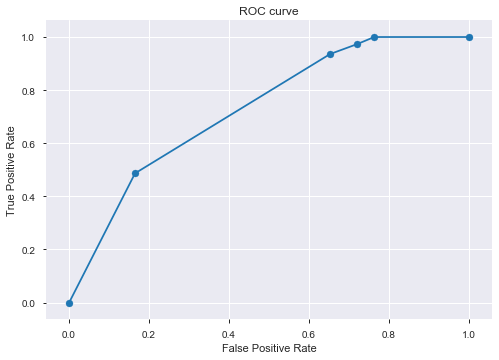

In [27]:
# See the results on a plot.
# This is the "Receiver Operating Characteristic curve"
import matplotlib.pyplot as plt
plt.scatter(fpr, tpr)
plt.plot(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate');

In [28]:
# Use scikit-learn to calculate the area under the curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_val,y_pred_proba)

0.7306096111010776

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer

In [30]:
pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy='median'),
    RandomForestClassifier(n_estimators=100,random_state=42,n_jobs=-1)
)

pipeline.fit(X_train,y_train)
print('Validation Accuracy', pipeline.score(X_val,y_val))

Validation Accuracy 0.7230769230769231


In [31]:
transformers=make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy='median')
)

In [32]:
X_train_transformed = transformers.fit_transform(X_train)
X_val_transformed= transformers.transform(X_val)
model = RandomForestClassifier(n_estimators=100,random_state=42,n_jobs=-1)
model.fit(X_train_transformed,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [33]:
import eli5
from eli5.sklearn import PermutationImportance

In [34]:
permuter= PermutationImportance(
    model,
    scoring='accuracy',
    n_iter=5,
    random_state=42
)
permuter.fit(X_val_transformed,y_val)

PermutationImportance(cv='prefit',
                      estimator=RandomForestClassifier(bootstrap=True,
                                                       ccp_alpha=0.0,
                                                       class_weight=None,
                                                       criterion='gini',
                                                       max_depth=None,
                                                       max_features='auto',
                                                       max_leaf_nodes=None,
                                                       max_samples=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fr

In [35]:
feature_names=X_val.columns.tolist()
pd.Series(permuter.feature_importances_,feature_names).sort_values()

vpp_lic             0.000000
sup_devices.num     0.001346
cont_rating         0.004808
ipadSc_urls.num     0.005769
lang.num            0.010192
price               0.012692
prime_genre         0.013077
size_bytes          0.014615
id                  0.027308
rating_count_ver    0.031923
rating_count_tot    0.121346
dtype: float64

In [36]:
eli5.show_weights(
    permuter,
    top=None,
    feature_names=feature_names
)

In [37]:
minimum_importance=0
mask=permuter.feature_importances_ > minimum_importance
features=X_train.columns[mask]
X_train= X_train[features]

In [38]:
X_val=X_val[features]
pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy='median'),
    RandomForestClassifier(n_estimators=100,random_state=42,n_jobs=-1)
)

pipeline.fit(X_train,y_train)
print('Validation Accuracy', pipeline.score(X_val,y_val))

Validation Accuracy 0.7278846153846154


In [39]:
from xgboost import XGBClassifier

In [40]:
from xgboost import XGBClassifier

pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    XGBClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)

pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['cont_rating', 'prime_genre'],
                                drop_invariant=False, handle_missing='value',
                                handle_unknown='value',
                                mapping=[{'col': 'cont_rating',
                                          'data_type': dtype('O'),
                                          'mapping': 12+    1
9+     2
4+     3
17+    4
NaN   -2
dtype: int64},
                                         {'col': 'prime_genre',
                                          'data_type': dtype('O'),
                                          'mapping': Finance               1
Games                 2
Entertainment         3
Music                 4
Educ...
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, learning_ra

In [41]:
from sklearn.metrics import accuracy_score
y_pred = pipeline.predict(X_val)
print('Validation Accuracy', accuracy_score(y_val, y_pred))

Validation Accuracy 0.7096153846153846
